<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - TRỰC QUAN HOÁ DỮ LIỆU 📌
</div>

<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Giai đoạn 2.1 - Khám phá dữ liệu (tiếp) 📌
</div>

### Nhập các thư viện cần thiết

In [24]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from datetime import datetime, date


warnings.simplefilter('ignore')

### Đọc dữ liệu

In [28]:
df = pd.read_csv('./data/Water_Cleaner_1.csv', parse_dates=['Date'], date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d'))

### 1. Chronological Order(Thứ tự thời gian) & Equidistant Timestamps (Dấu thời gian cách đều)

Dữ liệu phải được sắp xếp theo thứ tự thời gian và các dấu thời gian phải cách đều nhau trong chuỗi thời gian. Thứ tự thời gian có thể đạt được bằng cách sắp xếp lại DataFrame theo các dấu thời gian. Các dấu thời gian cách đều nhau chỉ ra rằng các khoảng thời gian là không đổi. ể kiểm tra điều này, có thể lấy sự khác biệt giữa mỗi dấu thời gian. Nếu không phải như vậy, có thể quyết định một khoảng thời gian cố định và lấy mẫu lại dữ liệu - `Resampling`.



In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  4199 non-null   datetime64[ns]
 1   Rainfall              4199 non-null   float64       
 2   Depth_to_Groundwater  4172 non-null   float64       
 3   Temperature           4199 non-null   float64       
 4   Drainage_Volume       4198 non-null   float64       
 5   River_Hydrometry      4199 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 197.0 KB


In [30]:
df = df.sort_values(by='Date')

# Check time intervals
df['Time_Interval'] = df['Date'] - df['Date'].shift(1)

df[['Date', 'Time_Interval']].head()

,Date,Time_Interval
0,2009-01-01,NaT
1,2009-01-02,1 days
2,2009-01-03,1 days
3,2009-01-04,1 days
4,2009-01-05,1 days


Trong dữ liệu này, điều này đã được thực hiện: Khoảng thời gian là một ngày và dữ liệu đã được sắp xếp theo thứ tự thời gian. Do đó, không cần thực hiện bước chuẩn bị dữ liệu bổ sung này.

### 2. Handle Missings - Xử lý dữ liệu bị thiếu 

In [31]:
df = df.drop('Time_Interval', axis=1)
df.isnull().sum()

Date                     0
Rainfall                 0
Depth_to_Groundwater    27
Temperature              0
Drainage_Volume          1
River_Hydrometry         0
dtype: int64

- Như đã thấy, thì tập dữ liệu vẫn còn một số dữ liệu null.  
- Hơn nữa, trực quan theo Time-Series cho thấy các giá trị 0 là null đối với D`epth_to_Groundwater` và `Drainage_Volume`. Tiếp theo sẽ phải xử lý bằng cách thay thế bằng `nan` và sau đó filling.

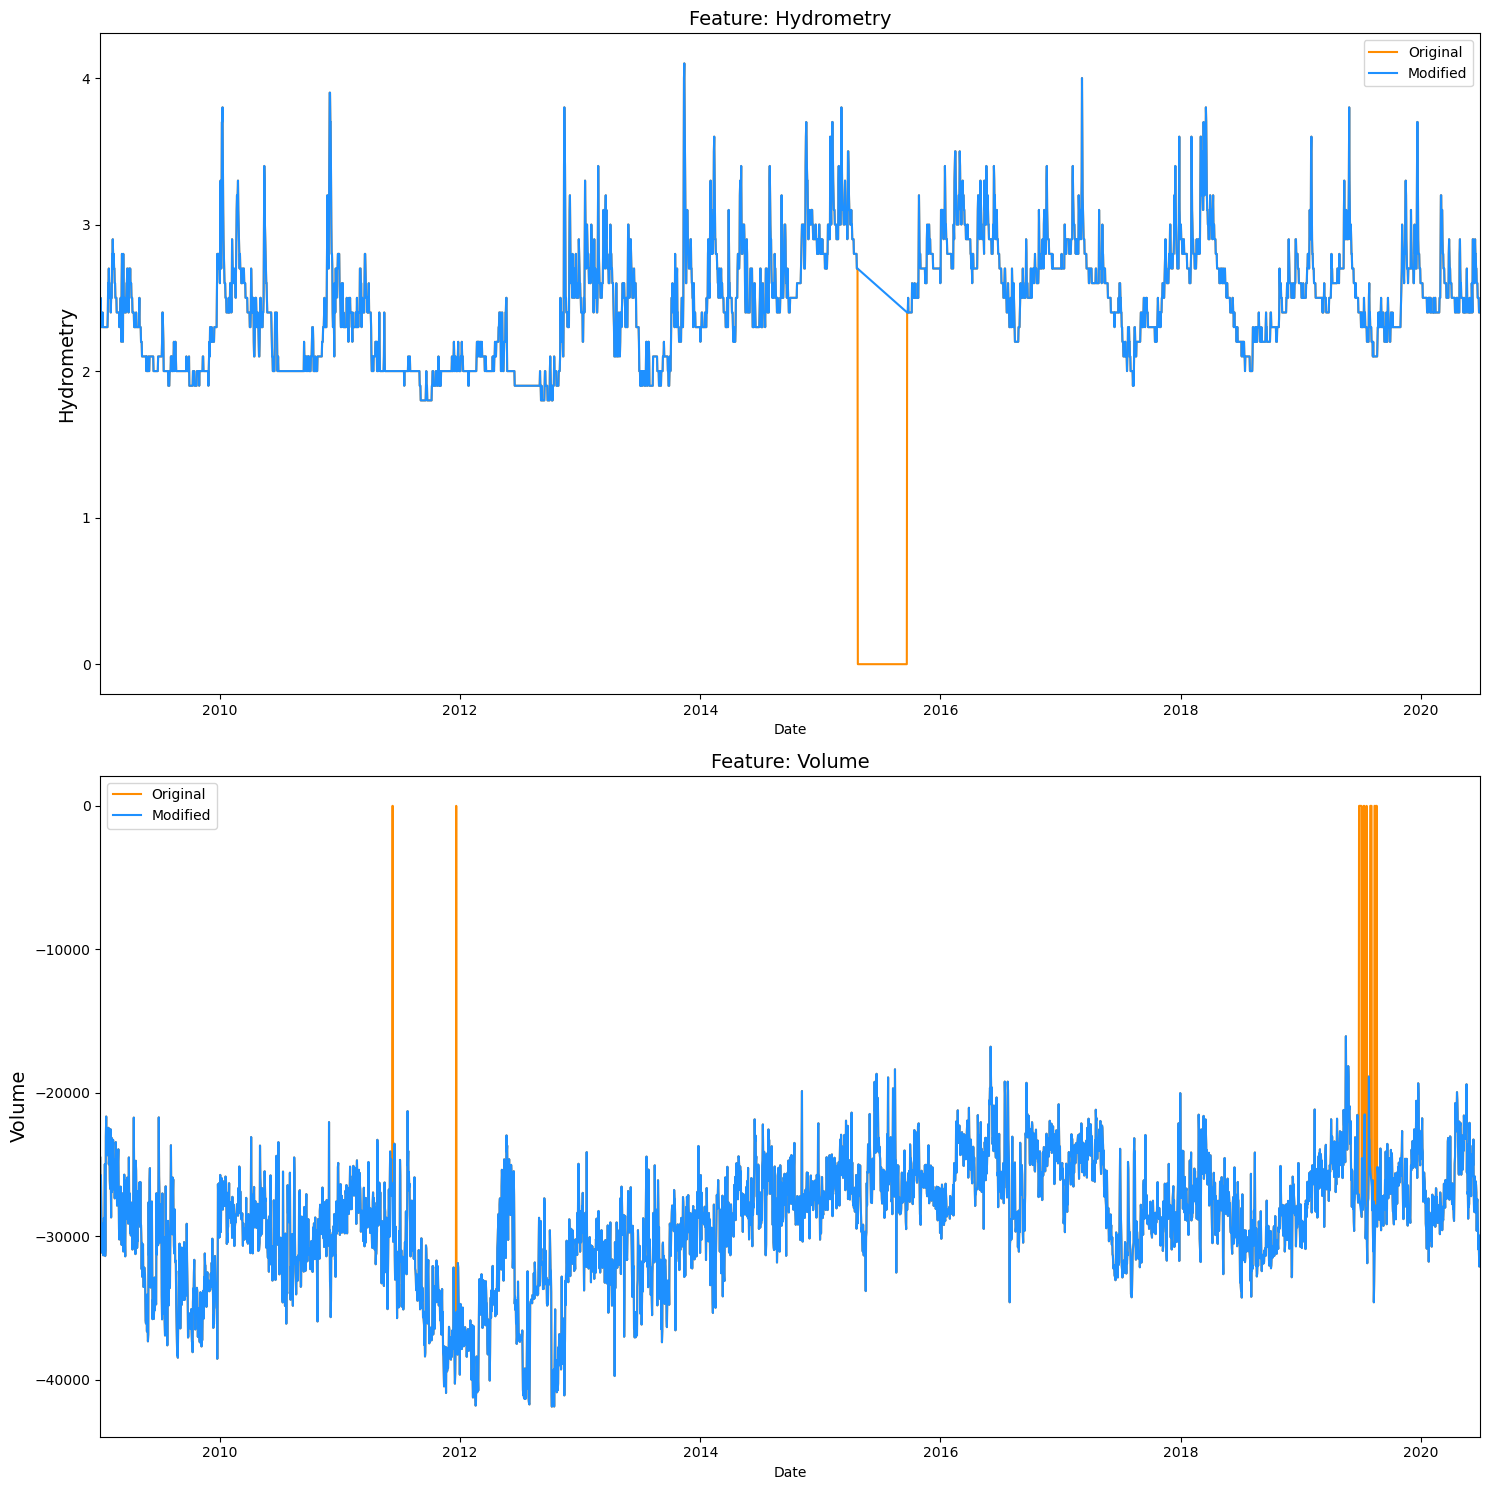

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

# River_Hydrometry
old_river_hydrometry = df.River_Hydrometry.copy()
# Thay thế giá trị 0 bằng NaN
df['River_Hydrometry'] = np.where(df.River_Hydrometry == 0, np.nan, df.River_Hydrometry)

sns.lineplot(x=df.Date, y=old_river_hydrometry.fillna(np.inf), ax=ax[0], color='darkorange', label='Original')
sns.lineplot(x=df.Date, y=df.River_Hydrometry.fillna(np.inf), ax=ax[0], color='dodgerblue', label='Modified')
ax[0].set_title('Feature: Hydrometry', fontsize=14)
ax[0].set_ylabel('Hydrometry', fontsize=14)

# Drainage_Volume
old_drainage_volume = df.Drainage_Volume.copy()
# Thay thế giá trị 0 bằng NaN
df['Drainage_Volume'] = np.where(df.Drainage_Volume == 0, np.nan, df.Drainage_Volume)

sns.lineplot(x=df.Date, y=old_drainage_volume.fillna(np.inf), ax=ax[1], color='darkorange', label='Original')
sns.lineplot(x=df.Date, y=df.Drainage_Volume.fillna(np.inf), ax=ax[1], color='dodgerblue', label='Modified')
ax[1].set_title('Feature: Volume', fontsize=14)
ax[1].set_ylabel('Volume', fontsize=14)

# Đặt giới hạn trục x cho cả hai biểu đồ
for i in range(2):
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.tight_layout()
plt.show()

### Lưu dữ liệu vào tệp .csv

In [ ]:
save_name = "Water_Cleaner_2.csv"
df.to_csv("./data/" + save_name, index=False)